In [1]:
#Loading different libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Section 1: Data Collection and Data Processinng

In [2]:
#Loading the data using pandas.
insurance_df=pd.read_csv('insurance.csv')
in_df=pd.read_csv('insurance.csv')

In [3]:
#Getting data types of each column.
insurance_df.dtypes

Age           int64
Sex          object
BMI         float64
Children      int64
Smoker       object
Region       object
Charges     float64
dtype: object

In [4]:
#Getting shape of the data.
insurance_df.shape

(1338, 7)

The dataset has some features with categorical values, so we need them to be converted into numerical values.


In [5]:
#Converting categorical values to numerical values.
label_encoder = preprocessing.LabelEncoder()
insurance_df['Sex'] = label_encoder.fit_transform(insurance_df['Sex'])
insurance_df['Smoker'] = label_encoder.fit_transform(insurance_df['Smoker'])
insurance_df['Region'] = label_encoder.fit_transform(insurance_df['Region'])

insurance_df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
#Checking if there is any null values.
insurance_df.isna().any()

Age         False
Sex         False
BMI         False
Children    False
Smoker      False
Region      False
Charges     False
dtype: bool

In [7]:
#Chacking if there is any null values.
insurance_df.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

By describing the dataset, we can know that if the dataset has outliers in it or not. We can see that there are some outliers and the data isn't following normal distribution, so for this reason we will be using Inter Quartile Range(IQR).

In [8]:
#Describing the data which is basically summary of the data.
insurance_df.describe()

,Age,Sex,BMI,Children,Smoker,Region,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [9]:
#Using Inter Quartile range for removing outliers where the First Quartile is 25% and the Third Quartile is 75%.
def find_outliers_IQR(insurance_df):
   Quartile1=insurance_df.quantile(0.25)
   Quartile3=insurance_df.quantile(0.75)
   IQR=Quartile3-Quartile1
   ins_outliers = insurance_df[((insurance_df<(Quartile1-1.5*IQR)) | (insurance_df>(Quartile3+1.5*IQR)))]
   return ins_outliers

In [10]:
#Finding outliers BMI column.
outliers_bmi = find_outliers_IQR(insurance_df['BMI'])
print('Number of outliers: ' + str(len(outliers_bmi)))
print('Maximum outlier value: ' + str(outliers_bmi.max()))
print('Minimum outlier value: '+ str(outliers_bmi.min()))

Number of outliers: 9
Maximum outlier value: 53.13
Minimum outlier value: 47.41


In [11]:
#Finding outliers in Charges column.
outliers_charge = find_outliers_IQR(insurance_df['Charges'])
print('Number of outliers: ' + str(len(outliers_charge)))
print('Maximum outlier value: ' + str(outliers_charge.max()))
print('Minimum outlier value: '+ str(outliers_charge.min()))

Number of outliers: 139
Maximum outlier value: 63770.42801
Minimum outlier value: 34617.84065


In [12]:
#Dropping the outliers.
def drop_outliers_IQR(df):
   Quartile1=insurance_df.quantile(0.25)
   Quartile3=insurance_df.quantile(0.75)
   IQR=Quartile3-Quartile1
   not_outliers = insurance_df[~((insurance_df<(Quartile1-1.5*IQR)) | (insurance_df>(Quartile3+1.5*IQR)))]
   return not_outliers

In [13]:
#Data after dropping the outliers.
insurance_df = drop_outliers_IQR(insurance_df)
insurance_df

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,NaN,3,16884.92400
1,18,1,33.770,1,0.0,2,1725.55230
2,28,1,33.000,3,0.0,2,4449.46200
3,33,1,22.705,0,0.0,1,21984.47061
4,32,1,28.880,0,0.0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0.0,1,10600.54830
1334,18,0,31.920,0,0.0,0,2205.98080
1335,18,0,36.850,0,0.0,2,1629.83350
1336,21,0,25.800,0,0.0,3,2007.94500


In [14]:
#Filling NaN in the Smoker with 1 because all the 1's got converted into NaN after dropping the outliers.
insurance_df = insurance_df.fillna(1)
insurance_df

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1.0,3,16884.92400
1,18,1,33.770,1,0.0,2,1725.55230
2,28,1,33.000,3,0.0,2,4449.46200
3,33,1,22.705,0,0.0,1,21984.47061
4,32,1,28.880,0,0.0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0.0,1,10600.54830
1334,18,0,31.920,0,0.0,0,2205.98080
1335,18,0,36.850,0,0.0,2,1629.83350
1336,21,0,25.800,0,0.0,3,2007.94500


In [15]:
#Describing the data which is basically summary of the data after dropping the outliers.
insurance_df.describe()

,Age,Sex,BMI,Children,Smoker,Region,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.338666,1.094918,0.204783,1.515695,8896.498751
std,14.049960,0.500160,6.375208,1.205493,0.403694,1.104885,7494.228912
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,0.000000,26.125000,0.000000,0.000000,1.000000,3064.583363
50%,39.000000,1.000000,30.230000,1.000000,0.000000,2.000000,7331.398100
75%,51.000000,1.000000,34.430000,2.000000,0.000000,2.000000,12269.424550
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,34472.841000


#Section 2: Data Exploration and Data Visulization

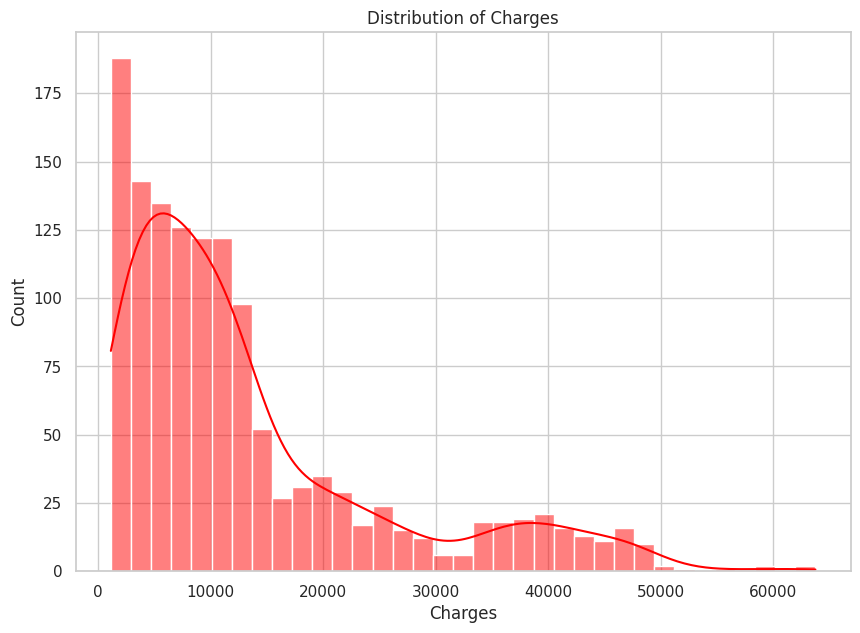

In [16]:
#Plotting a  graph for distribution of charges.
sns.set(style='whitegrid')
plt.figure(figsize=(10, 7))

sns.histplot(data=in_df, x='Charges', kde=True, color='Red', bins=35)
plt.title('Distribution of Charges')

plt.show()

<ipython-input-17-ea85fe13e3a2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(in_df['Charges'], kde = True, color = 'Red')


Text(0.5, 1.0, 'Distribution of Charges')

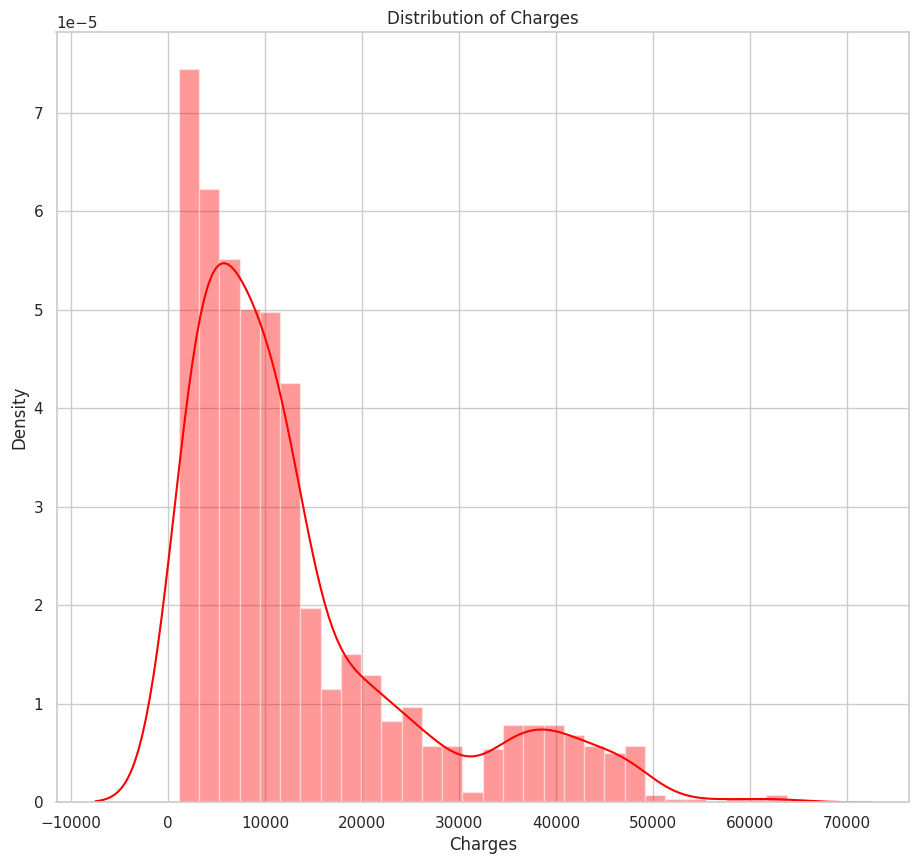

In [17]:
#Plotting a smoothen graph for distribution of charges.
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(11, 10))
ax = sns.distplot(in_df['Charges'], kde = True, color = 'Red')
plt.title('Distribution of Charges')

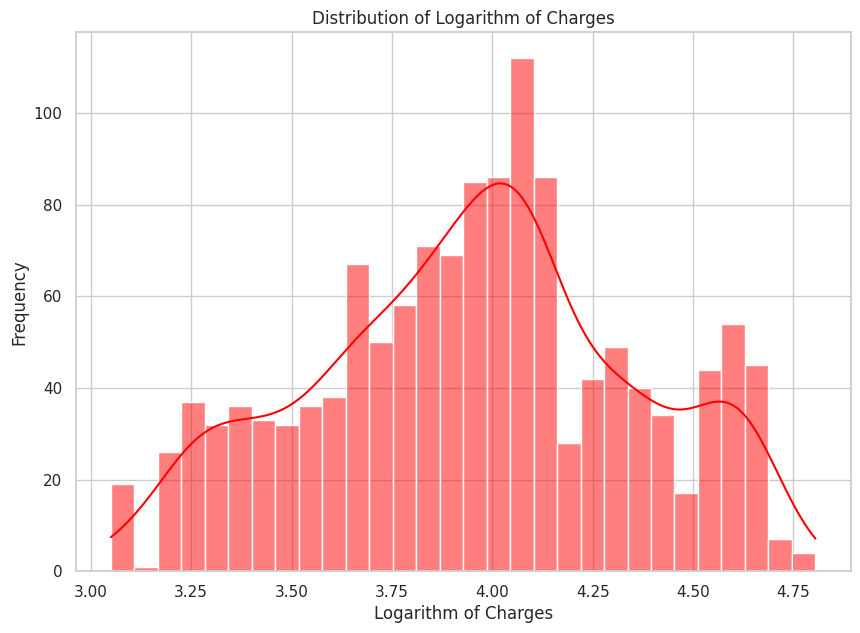

In [18]:
#Plotting a logarithmic graph for Distribution of Logarithm of Charges.
plt.figure(figsize=(10, 7))

charges_log = np.log10(in_df['Charges'])
sns.histplot(charges_log, kde=True, color='Red', bins=30)

plt.title('Distribution of Logarithm of Charges')
plt.xlabel('Logarithm of Charges')
plt.ylabel('Frequency')

plt.show()

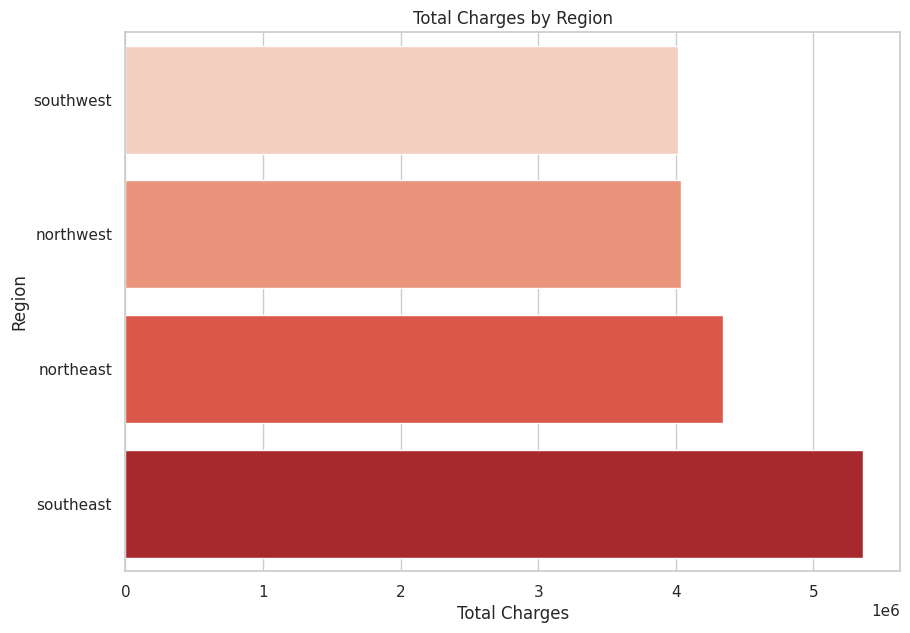

In [19]:
#Plotting a graph for total charges by region.
charges = in_df.groupby('Region')['Charges'].sum().sort_values(ascending=True)
plt.figure(figsize=(10, 7))

sns.barplot(x=charges.head(), y=charges.head().index, palette='Reds')

plt.title('Total Charges by Region')
plt.xlabel('Total Charges')
plt.ylabel('Region')

plt.show()

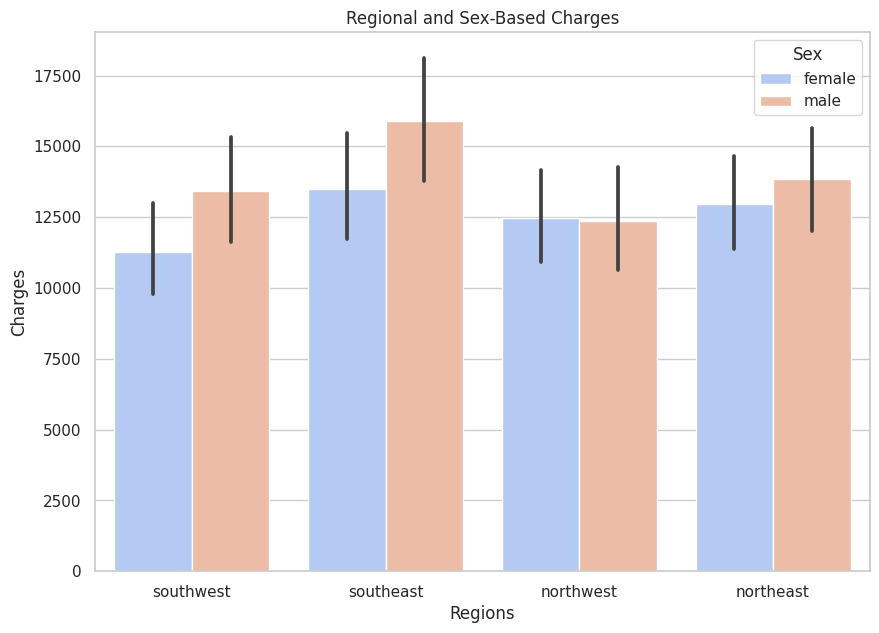

In [20]:
#Plotting a graph for comparing different region with the gender.
plt.figure(figsize =(10, 7))

sns.barplot(data=in_df, palette='coolwarm',x='Region',y='Charges',hue='Sex')



plt.title('Regional and Sex-Based Charges')
plt.xlabel('Regions')
plt.ylabel('Charges')
plt.show()


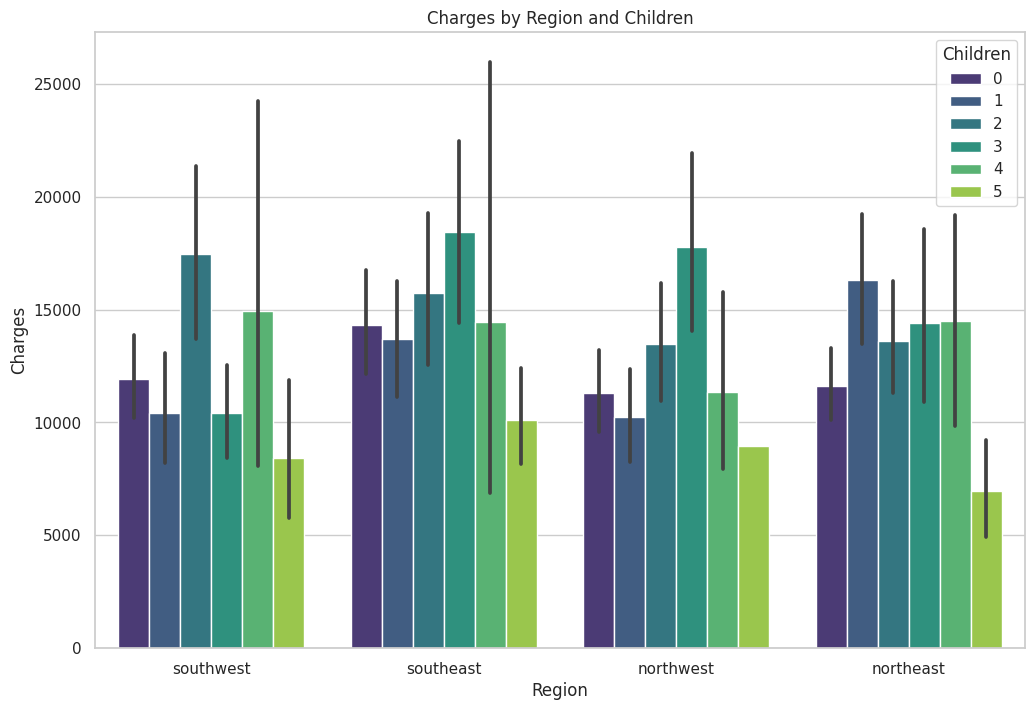

In [21]:
#Plotting a graph for medical insurance charges for families in different regions having different number of children.
plt.figure(figsize=(12, 8))

sns.barplot(x='Region', y='Charges', hue='Children', data=in_df, palette='viridis')

plt.title('Charges by Region and Children')
plt.xlabel('Region')
plt.ylabel('Charges')

plt.show()


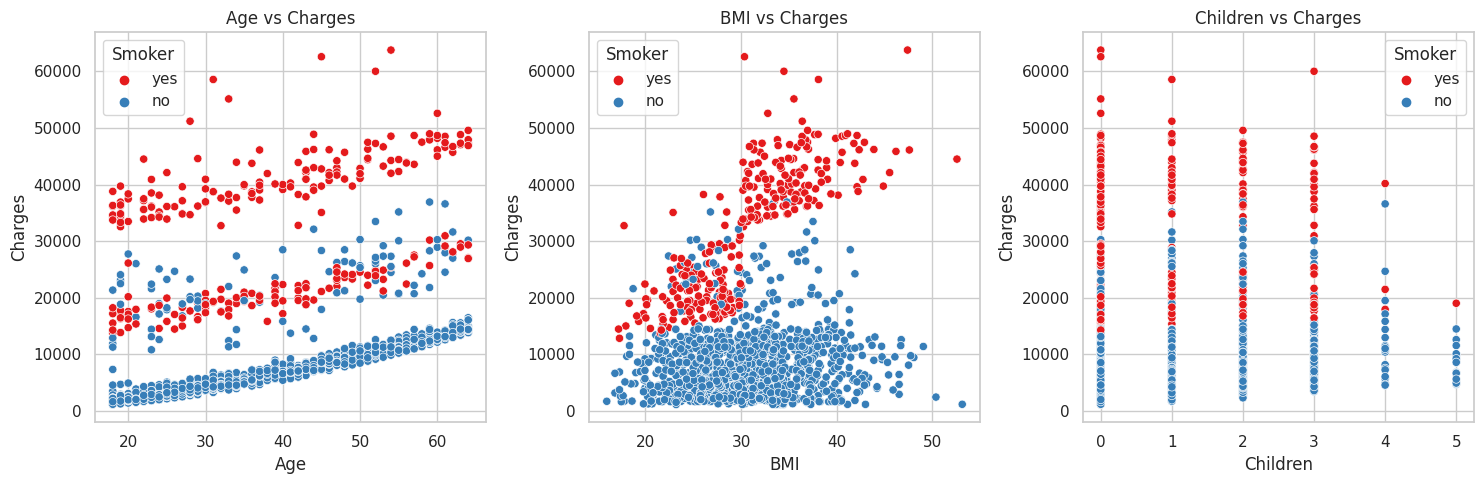

In [22]:
#Plotting a graph to compare charges with age, bmi and children with respect to if they smoke or not.
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.scatterplot(x='Age', y='Charges', data=in_df, hue='Smoker', palette='Set1', ax=axes[0])
axes[0].set_title('Age vs Charges')

sns.scatterplot(x='BMI', y='Charges', data=in_df, hue='Smoker', palette='Set1', ax=axes[1])
axes[1].set_title('BMI vs Charges')

sns.scatterplot(x='Children', y='Charges', data=in_df, hue='Smoker', palette='Set1', ax=axes[2])
axes[2].set_title('Children vs Charges')


plt.tight_layout()
plt.show()




In [23]:
#Converting sex, smoker and region data type into categorical values.
in_df[['Sex', 'Smoker', 'Region']] = in_df[['Sex', 'Smoker', 'Region']].astype('category')
in_df.dtypes

Age            int64
Sex         category
BMI          float64
Children       int64
Smoker      category
Region      category
Charges      float64
dtype: object

In [24]:
#Label encoding 3 categorical columns into numerical values.
label = LabelEncoder()
label.fit(in_df.Sex.drop_duplicates())
in_df.Sex = label.transform(in_df.Sex)
label.fit(in_df.Smoker.drop_duplicates())
in_df.Smoker = label.transform(in_df.Smoker)
label.fit(in_df.Region.drop_duplicates())
in_df.Region = label.transform(in_df.Region)
in_df.dtypes

Age           int64
Sex           int64
BMI         float64
Children      int64
Smoker        int64
Region        int64
Charges     float64
dtype: object

Using Pearson Correlation

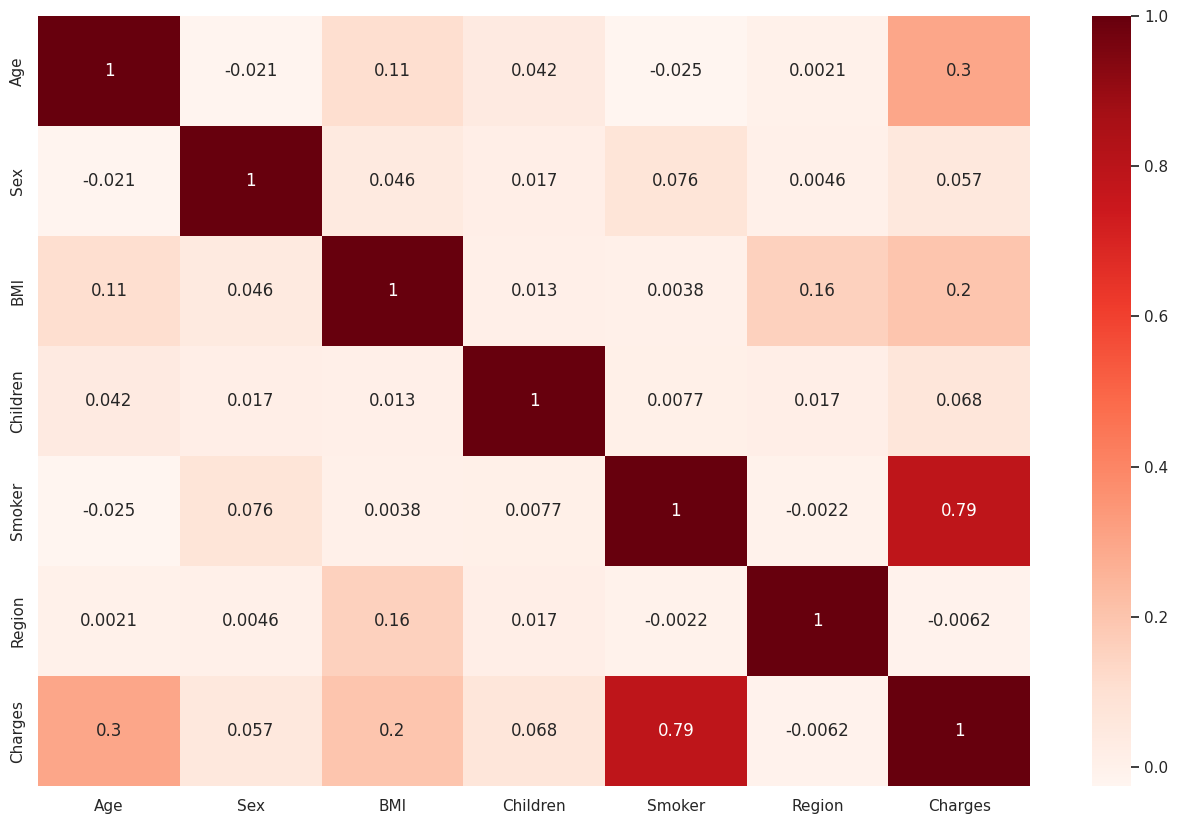

In [25]:

plt.figure(figsize=(16,10))
corelat = in_df.corr()
sns.heatmap(corelat, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
corelat_targ = corelat["Charges"]

rel_feat = corelat_targ
rel_feat

Age         0.299008
Sex         0.057292
BMI         0.198341
Children    0.067998
Smoker      0.787251
Region     -0.006208
Charges     1.000000
Name: Charges, dtype: float64

#Section 3: Model Exploration and Model Selection

In [28]:
y = in_df['Charges']
X = in_df.drop(['Charges'],axis=1)

X_train, X_1, y_train, y_1 = train_test_split(X, y , test_size=0.4, random_state=9)
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1 , test_size=0.375, random_state=9)

In [29]:
print(len(y), len(y_train), len(y_val), len(y_test))

1338 802 335 201


Linear Regression

In [30]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_lr = linear_regression.predict(X_val)

In [31]:
score_lr = linear_regression.score(X_val, y_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)

print("Accuracy of Model: ","{:}".format(score_lr*100),'%')
print("MAE: ","{:}".format(mae_lr))
print("MSE: ","{:}".format(mse_lr))
print("R-Squared: ","{:}".format(r2_lr*100),'%')

Accuracy of Model:  74.26809356314793 %
MAE:  4092.938596373554
MSE:  35183914.26199526
R-Squared:  74.26809356314793 %


<Axes: xlabel='Charges'>

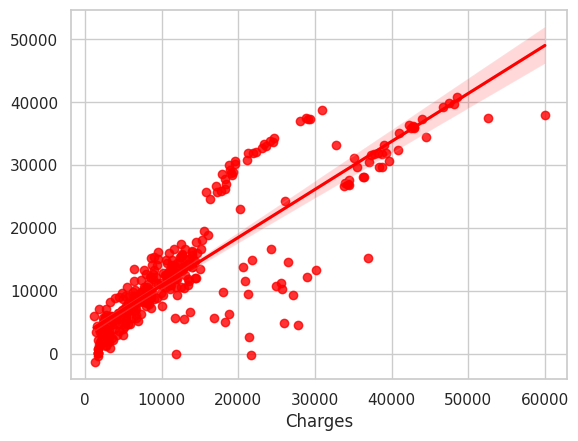

In [32]:
sns.regplot(x=y_val, y=y_pred_lr, color='red')

#Section 4: Performance Evaluation and Performance Interpretation

In [33]:
y_pred_test = linear_regression.predict(X_test)

In [34]:
score_test = linear_regression.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Accuracy: ","{:}".format(score_test*100),'%')
print("MSE: ","{:}".format(mse_test))
print("MAE: ","{:}".format(mae_test))
print("R-Squared: ","{:}".format(r2_test*100),'%')

Accuracy:  76.15303669682743 %
MSE:  30994849.343204744
MAE:  3800.411549901234
R-Squared:  76.15303669682743 %
